In [1]:
import numpy as np
import pandas as pd

In [2]:
#Load the dataset
Data = pd.read_csv('/Users/teneshasmith/Downloads/Breast_Cancer.csv')

In [3]:
Data

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive


In [4]:
#Relevant Packages
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [5]:
#Extracting input and output data
X = Data.drop(['Status', 'Survival Months'], axis=1)#all columns EXCEPT Status and Survival
y=Data.iloc[:,15] #Survival is our target feature hence column 14

In [6]:
#confirming columns are correctly allocated
X

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1


In [7]:
y

0       Alive
1       Alive
2       Alive
3       Alive
4       Alive
        ...  
4019    Alive
4020    Alive
4021    Alive
4022    Alive
4023    Alive
Name: Status, Length: 4024, dtype: object

In [8]:
# Specify indices for ordinal and nominal variables
ordinal_indices = [ 3, 4, 5, 6, 7, 8]  
nominal_indices = [1,2,10,11]  

# Defining the ColumnTransformer with separate handling for ordinal and nominal variables
ct = ColumnTransformer(
    transformers=[
        ("ordinal", OrdinalEncoder(), ordinal_indices),
        ("nominal", OneHotEncoder(), nominal_indices)  
    ],
    remainder='passthrough'  # Keep other columns unchanged
)

# Apply the transformations to the dataset
X_transformer= ct.fit_transform(X)


In [9]:
#encoding the output data (Survival)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(y)

#checking columns have been correctly encoded
y

array([0, 0, 0, ..., 0, 0, 0])

In [11]:
# Ensure X_transformer is dense before normalization
if hasattr(X_transformer, "toarray"):  # Check if it's sparse
    X_transformer = X_transformer.toarray()

# Normalize the transformed data
scaler = MinMaxScaler()
X = scaler.fit_transform(X_transformer)


print("\nNormalized Data:")
print(X)


Normalized Data:
[[0.         0.         0.         ... 0.02158273 0.38333333 0.        ]
 [0.33333333 0.5        0.5        ... 0.24460432 0.21666667 0.08888889]
 [0.66666667 1.         1.         ... 0.44604317 0.21666667 0.13333333]
 ...
 [0.33333333 0.         0.25       ... 0.15107914 0.16666667 0.04444444]
 [0.33333333 0.         0.25       ... 0.30935252 0.16666667 0.        ]
 [0.33333333 0.         0.25       ... 0.20863309 0.1        0.02222222]]


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn import svm

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [15]:
def confusion_metrics (conf_matrix):

    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)
## Evaluation metrics ##
# calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
# calculate mis-classification
    conf_misclassification = 1- conf_accuracy
 # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
# calculate the specificity
    conf_specificity = (TN / float(TN + FP))
# calculate precision
    conf_precision = (TP / float(TP + FP))
# calculate f_1 score//calculating the score and printing the results
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*50)
    print(f'Accuracy: {round(conf_accuracy,2)}') 
    print(f'Mis-Classification: {round(conf_misclassification,2)}') 
    print(f'Sensitivity: {round(conf_sensitivity,2)}') 
    print(f'Specificity: {round(conf_specificity,2)}') 
    print(f'Precision: {round(conf_precision,2)}')
    print(f'f_1 Score: {round(conf_f1,2)}')

In [16]:
print("Unique classes in target variable:")
print(Data['Status'].unique())  

# Map the classes to model predictions
print("\nClass mapping in the model:")
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
label_encoder.fit(Data['Status'])  
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

Unique classes in target variable:
['Alive' 'Dead']

Class mapping in the model:
{'Alive': 0, 'Dead': 1}


In [17]:
#Defining the classification type
SVM = svm.SVC(probability=True)
#Training the model
SVM.fit(X_train, y_train)
#Predict with model
y_pred1=SVM.predict(X_test)

In [18]:
#Printing the models predictions
print(y_pred1[:4], "...")

[0 0 0 0] ...


Text(0.5, 1.0, 'Support Vector Machine')

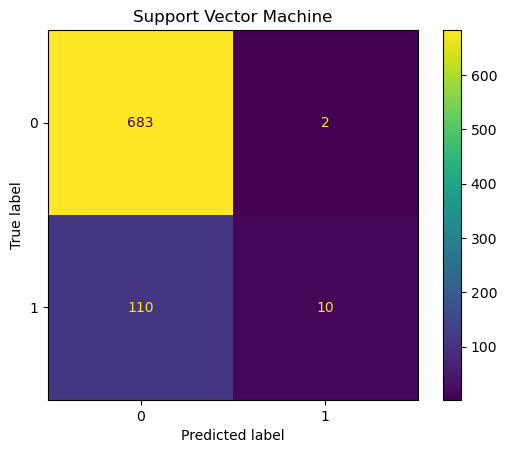

In [19]:
#confusion matrix//code applies labels and specifies the design of the CF//based on prediction results
cm1 = confusion_matrix(y_test, y_pred1, labels=SVM.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=SVM.classes_)
#display the plot and add a title
disp.plot()
plt.title("Support Vector Machine")

In [20]:
#printing the evaluation metrics for SVM
print('SVM metrics\n')
confusion_metrics(cm1)
print('\n\n')

SVM metrics

True Positives: 10
True Negatives: 683
False Positives: 2
False Negatives: 110
--------------------------------------------------
Accuracy: 0.86
Mis-Classification: 0.14
Sensitivity: 0.08
Specificity: 1.0
Precision: 0.83
f_1 Score: 0.15





In [17]:
#defining the model
logre = LogisticRegression()
#fitting the model
logre.fit(X_train, y_train)
#Predict with model
y_pred2=logre.predict(X_test)

#Printing the models predictions
print(y_pred2[:4], "...")

[0 0 0 0] ...


Text(0.5, 1.0, 'Logistic Regression')

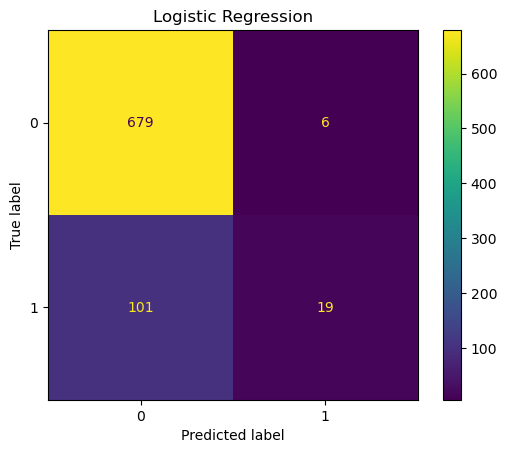

In [18]:
#confusion matrix//code applies labels and specifies the design of the CF//based on prediction results
cm2 = confusion_matrix(y_test, y_pred2, labels=logre.classes_)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2,display_labels=logre.classes_)
#display the plot and add a title
disp2.plot()
plt.title("Logistic Regression")

In [19]:
#printing the evaluation metrics for Logistic Regression
print('Logistic Regression metrics\n')
confusion_metrics(cm2)
print('\n\n')

Logistic Regression metrics

True Positives: 19
True Negatives: 679
False Positives: 6
False Negatives: 101
--------------------------------------------------
Accuracy: 0.87
Mis-Classification: 0.13
Sensitivity: 0.16
Specificity: 0.99
Precision: 0.76
f_1 Score: 0.26





In [23]:
#Defining the model
KNN = KNeighborsClassifier()
#training the models
KNN.fit(X_train, y_train)
#predicting with the model
y_pred3=KNN.predict(X_test)
#Printing the models predictions
print(y_pred2[:4], "...")

[0 0 0 0] ...


Text(0.5, 1.0, 'K-Nearest Neighbours')

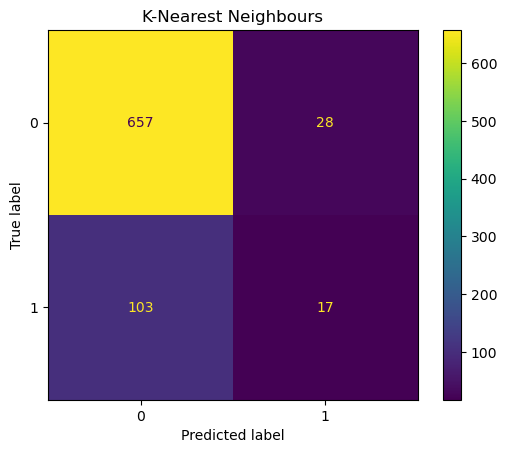

In [24]:
#Confusion matrix:KNN //code applies labels and specifies the design of the CF//based on prediction results
cm3 = confusion_matrix(y_test, y_pred3, labels=KNN.classes_)
#specifying the design
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm3,display_labels=KNN.classes_)
#generates the plot
disp3.plot()
#displays the title
plt.title("K-Nearest Neighbours")

In [25]:
#Evaluations based on confusion matrix
print('KNN metrics\n')
confusion_metrics(cm3)
print('\n\n')

KNN metrics

True Positives: 17
True Negatives: 657
False Positives: 28
False Negatives: 103
--------------------------------------------------
Accuracy: 0.84
Mis-Classification: 0.16
Sensitivity: 0.14
Specificity: 0.96
Precision: 0.38
f_1 Score: 0.21





In [26]:
#Defining the model
DT=DecisionTreeClassifier()
#Training the model
DT.fit(X_train, y_train)
#predicting with the model
y_pred4=DT.predict(X_test)

Text(0.5, 1.0, 'Decision Tree')

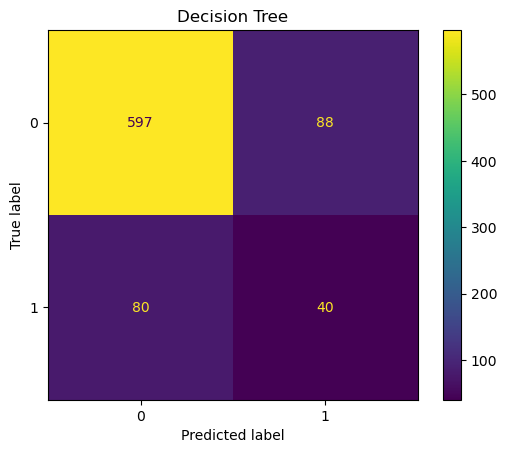

In [27]:
cm4 = confusion_matrix(y_test, y_pred4, labels=DT.classes_)
#determines the display
disp = ConfusionMatrixDisplay(confusion_matrix=cm4,display_labels=DT.classes_)
#to generate the plot
disp.plot()
#to set the title
plt.title("Decision Tree")

In [28]:
#evaluation metrics based on the prior confusion matrix
print('DT metrics\n')
confusion_metrics(cm4)
print('\n\n')

DT metrics

True Positives: 40
True Negatives: 597
False Positives: 88
False Negatives: 80
--------------------------------------------------
Accuracy: 0.79
Mis-Classification: 0.21
Sensitivity: 0.33
Specificity: 0.87
Precision: 0.31
f_1 Score: 0.32





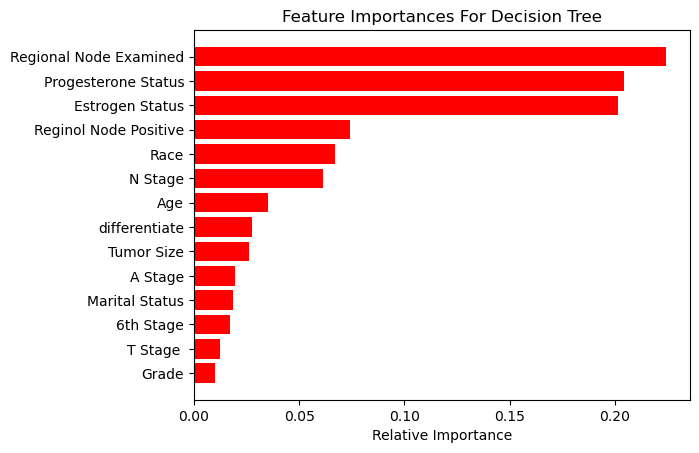

[(0.2245364694583568, 'Regional Node Examined'), (0.204621002750889, 'Progesterone Status'), (0.20163863454326106, 'Estrogen Status')]


In [29]:
#Plotting the features to determine importance, on predicting income
#specifiying the features
features = Data.columns
#specifying the importances
importances = DT.feature_importances_
#specifying the indices
indices = np.argsort(importances)
#creates the title
plt.title('Feature Importances For Decision Tree')
#defining the colour and alignment
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
#defining the labels on the x axis
plt.xlabel('Relative Importance')
#to show the plot
plt.show()

#confirming the top 3 features 
DT_top_features = sorted(zip(importances, features), reverse=True) [:3]
print(DT_top_features)

In [30]:
#defining the model
RF = RandomForestClassifier()
#Training the model
RF.fit(X_train, y_train)
#Predicting with the model
y_pred5=RF.predict(X_test)

Text(0.5, 1.0, 'Random Forest')

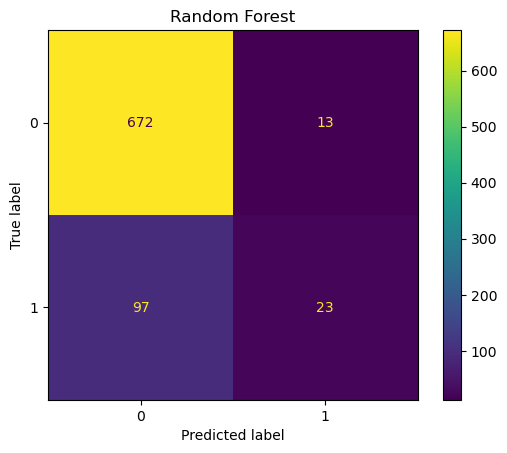

In [31]:
#creating the confusion matrix
cm5 = confusion_matrix(y_test, y_pred5, labels=RF.classes_)
#specifying the design
disp = ConfusionMatrixDisplay(confusion_matrix=cm5,display_labels=RF.classes_)
#to show the plot
disp.plot()
#to set the title
plt.title("Random Forest")

In [32]:
#evaluation based on the confusion matrix
print('RF metrics\n')
confusion_metrics(cm5)
print('\n\n')

RF metrics

True Positives: 23
True Negatives: 672
False Positives: 13
False Negatives: 97
--------------------------------------------------
Accuracy: 0.86
Mis-Classification: 0.14
Sensitivity: 0.19
Specificity: 0.98
Precision: 0.64
f_1 Score: 0.29





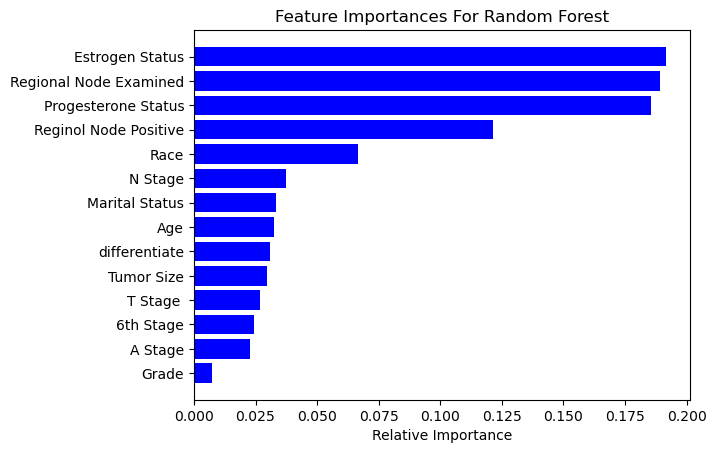

[(0.19178429004259423, 'Estrogen Status'), (0.18929489697070997, 'Regional Node Examined'), (0.18546143207770116, 'Progesterone Status')]


In [33]:
# Viewing importance of features to help predict income
#specifies features
features = Data.columns
#specifies the importances
importances = RF.feature_importances_
#specifies the indices
indices = np.argsort(importances)
#designs the plot#
#title
plt.title('Feature Importances For Random Forest') 
#alignment and colour scheme
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
#defines label on the x axis
plt.xlabel('Relative Importance')
#shows the plot
plt.show()

#confirming the top 3 features 
RF_top_features = sorted(zip(importances, features), reverse=True) [:3]
print(RF_top_features)

In [34]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
#Predicting with the model
y_pred6=gnb.predict(X_test)

Text(0.5, 1.0, 'Gussian Naive-Bayes')

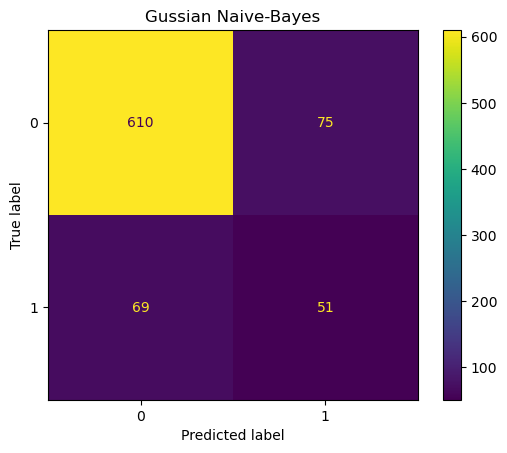

In [35]:
#creating the confusion matrix
cm6 = confusion_matrix(y_test, y_pred6, labels=gnb.classes_)
#specifying the design
disp = ConfusionMatrixDisplay(confusion_matrix=cm6,display_labels=gnb.classes_)
#to show the plot
disp.plot()
#to set the title
plt.title("Gussian Naive-Bayes")

In [36]:
#evaluation based on the confusion matrix
print(' gnb.metrics\n')
confusion_metrics(cm6)
print('\n\n')

 gnb.metrics

True Positives: 51
True Negatives: 610
False Positives: 75
False Negatives: 69
--------------------------------------------------
Accuracy: 0.82
Mis-Classification: 0.18
Sensitivity: 0.42
Specificity: 0.89
Precision: 0.4
f_1 Score: 0.41





# Explainability

In [20]:
import shap
import warnings
# Smaller sample of the test set to calculate SHAP values
X_test_sample = shap.sample(X_test, 100)
# Suppress warnings from sklearn's least_angle module
warnings.filterwarnings("ignore", category=RuntimeWarning, module="sklearn.linear_model._least_angle")

SHAP values shape: (805, 14, 2)
X_test shape: (805, 14)


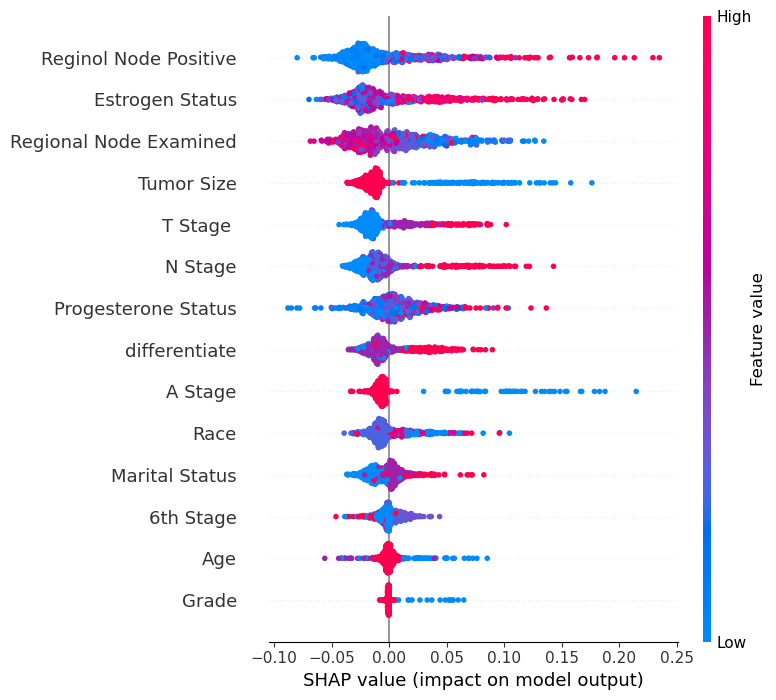

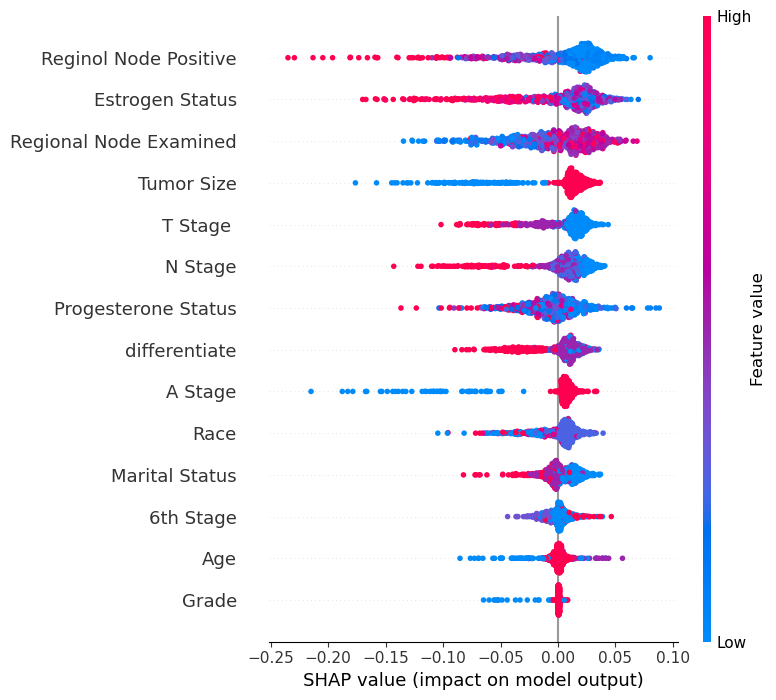

In [38]:
# Initialize TreeExplainer
explainer = shap.TreeExplainer(RF)

# Compute SHAP values
shap_values = explainer.shap_values(X_test_sample)
        
# Extract SHAP values for the died class
shap_values_survival = shap_values[..., 1]

# Visualize feature contributions for died
shap.summary_plot(shap_values_survival, X_test_sample,feature_names=Data.columns, max_display=15)

# Extract SHAP values for the survival class
shap_values_died = shap_values[..., 0]

# Visualize feature contributions for survival
shap.summary_plot(shap_values_died, X_test_sample, feature_names=Data.columns,max_display=15)

SHAP values shape: (805, 14, 2)
X_test shape: (805, 14)


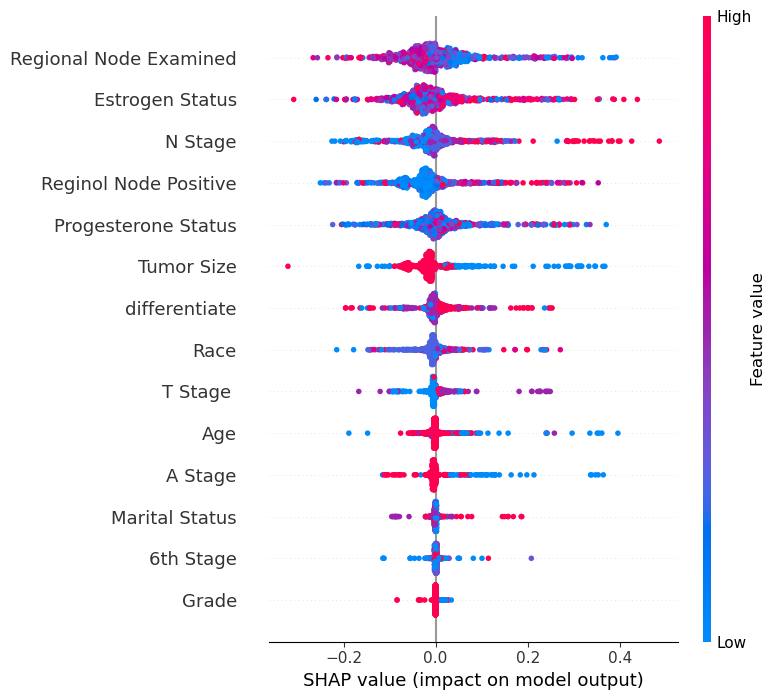

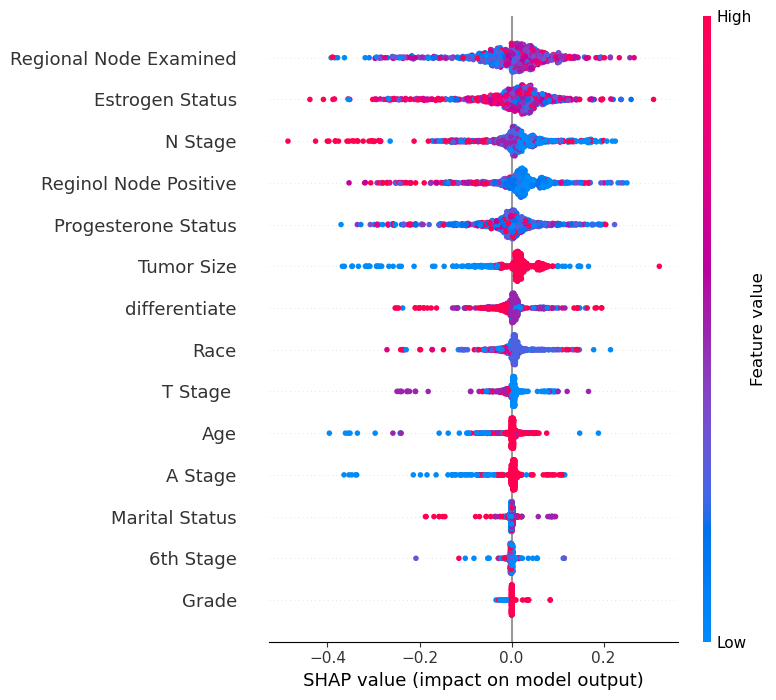

In [39]:
# Initialize TreeExplainer
explainer1 = shap.TreeExplainer(DT)

# Compute SHAP values
shap_values = explainer1.shap_values(X_test_sample)

# Extract SHAP values for the died class
shap_values_survival1 = shap_values[..., 1]

# Visualize feature contributions for died
shap.summary_plot(shap_values_survival1, X_test_sample,feature_names=Data.columns, max_display=15)

# Extract SHAP values for the survival class
shap_values_died2 = shap_values[..., 0]

# Visualize feature contributions for survival
shap.summary_plot(shap_values_died2, X_test_sample,feature_names=Data.columns, max_display=15)

In [24]:
explainer_linear = shap.LinearExplainer(logre, X_train)
shap_values_linear = explainer_linear.shap_values(X_test)

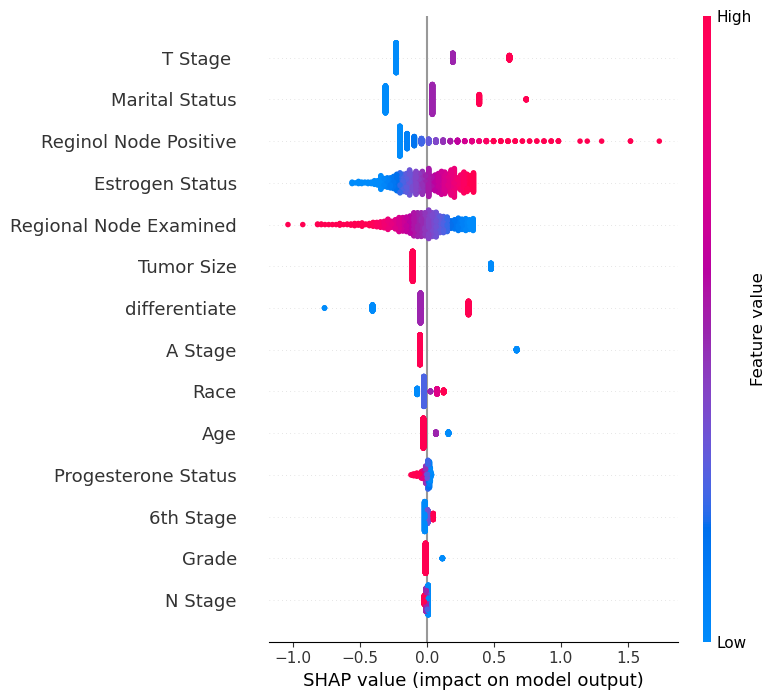

In [25]:
#alive
shap.summary_plot(shap_values_linear, X_test, feature_names=Data.columns)

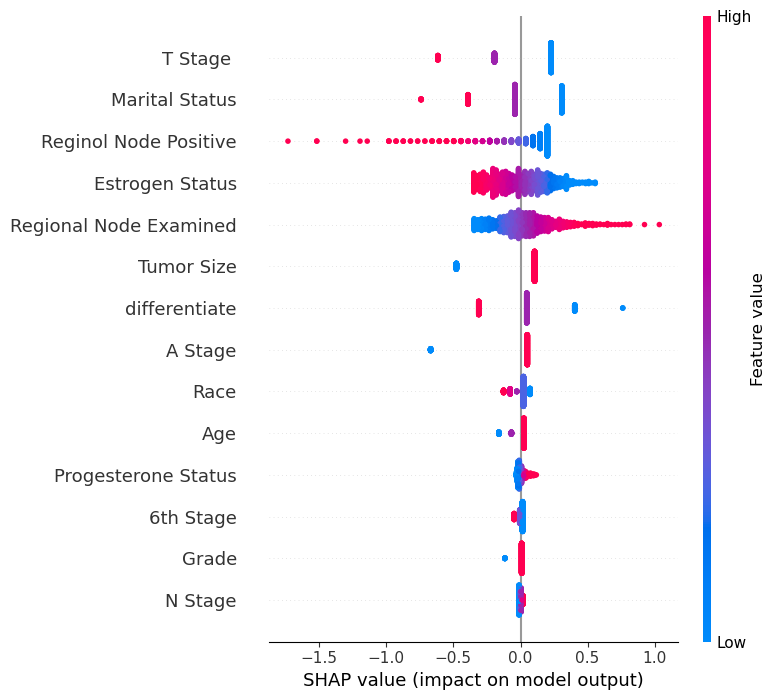

In [26]:
# Dead
shap_values_dead3 = -shap_values_linear

# Visualize feature contributions for predicting "dead"
shap.summary_plot(shap_values_dead3, X_test, feature_names=Data.columns, max_display=15)

In [22]:
explainer_kernel2 = shap.KernelExplainer(SVM.predict, X_train[:100]) 
shap_values_kernel2 = explainer_kernel2.shap_values(X_test_sample)

  0%|          | 0/100 [00:00<?, ?it/s]

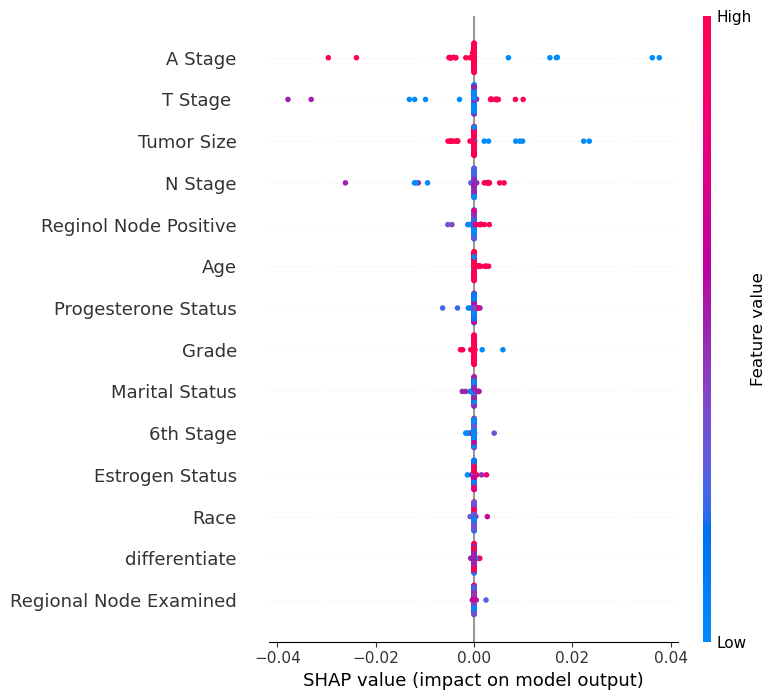

In [24]:
#alive
shap.summary_plot(shap_values_kernel2, X_test_sample, feature_names=Data.columns)

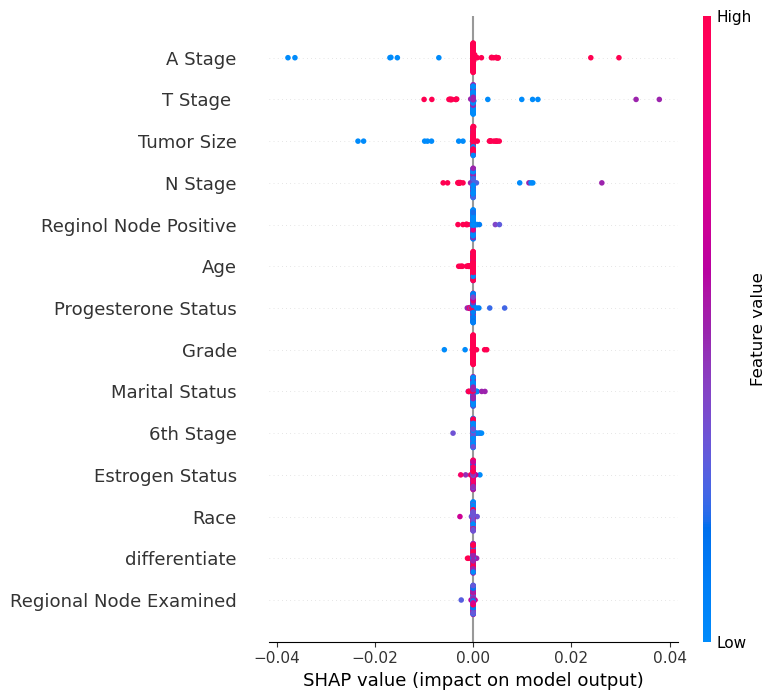

In [26]:
# Dead
shap_values_dead2 = -shap_values_kernel2

# Visualize feature contributions for predicting "dead"
shap.summary_plot(shap_values_dead2, X_test_sample, feature_names=Data.columns, max_display=15)

In [69]:
explainer_kernel1 = shap.KernelExplainer(KNN.predict, X_train[:100])  
shap_values_kernel1 = explainer_kernel1.shap_values(X_test_sample)

  0%|          | 0/100 [00:00<?, ?it/s]

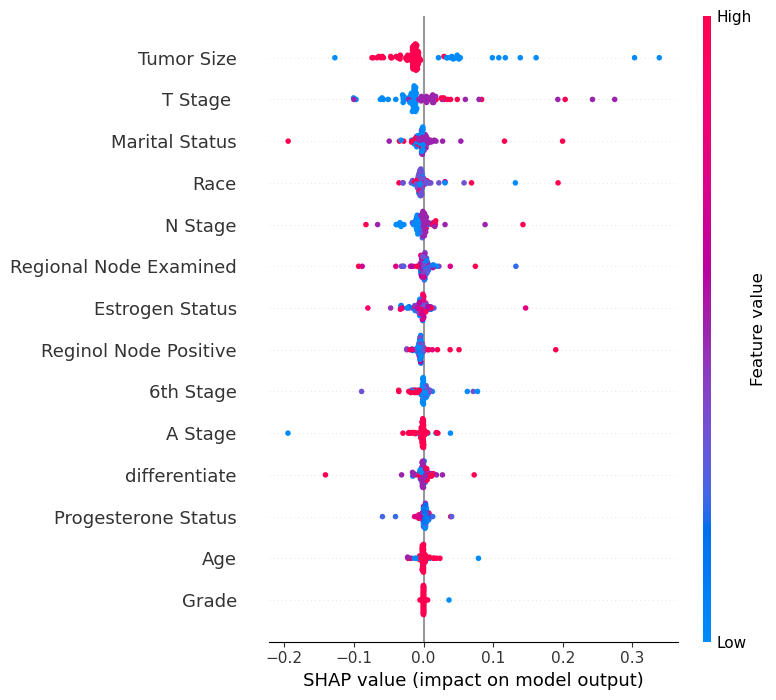

In [70]:
#alive
shap.summary_plot(shap_values_kernel1, X_test_sample, feature_names=Data.columns)

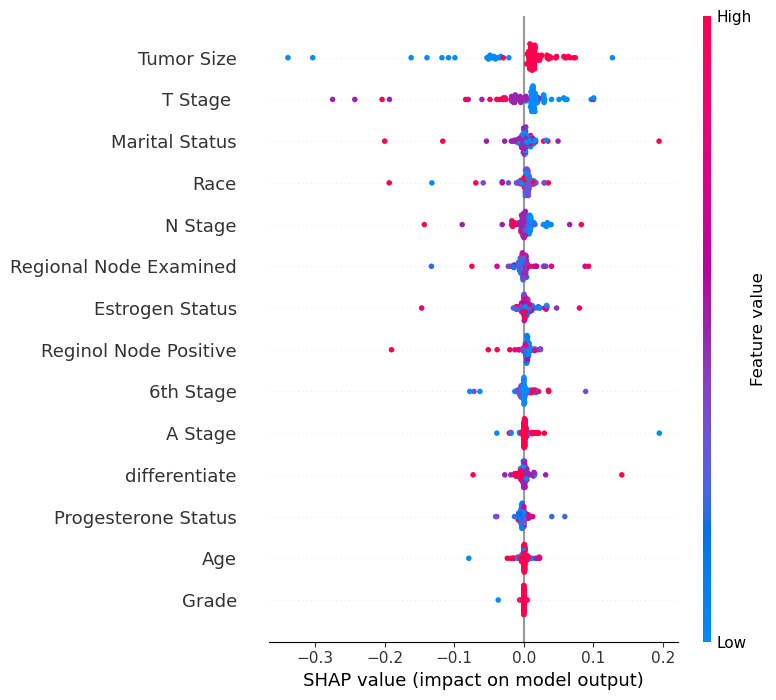

In [71]:
# Dead
shap_values_dead = -shap_values_kernel1

# Visualize feature contributions for predicting "dead"
shap.summary_plot(shap_values_dead, X_test_sample, feature_names=Data.columns, max_display=15)


In [73]:
explainer_kernel = shap.KernelExplainer(gnb.predict, X_train[:100])  
shap_values_kernel = explainer_kernel.shap_values(X_test_sample)

  0%|          | 0/100 [00:00<?, ?it/s]

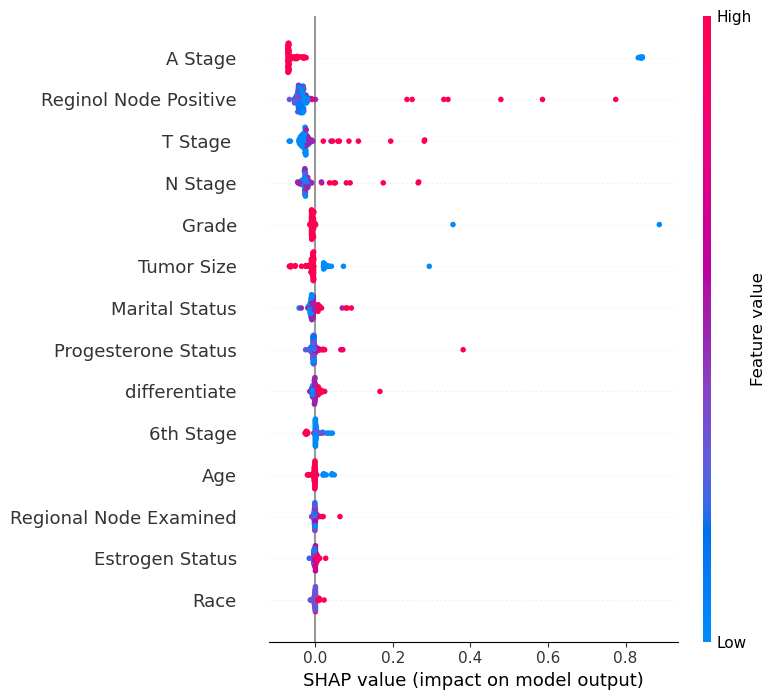

In [75]:
#alive
shap.summary_plot(shap_values_kernel, X_test_sample, feature_names=Data.columns)

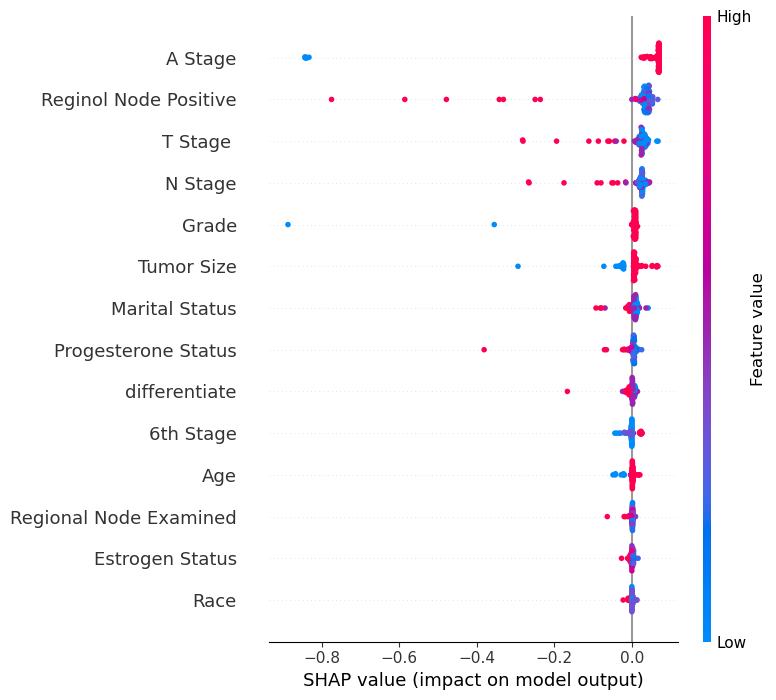

In [76]:
# Dead
shap_values_dead1 = -shap_values_kernel

# Visualize feature contributions for predicting "dead"
shap.summary_plot(shap_values_dead1, X_test_sample, feature_names=Data.columns, max_display=15)